In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from __future__ import division

In [88]:
def create_dota_dataframe(matchDetailsList):
    
    '''
    Takes in list of match detail json strings and converts
    into a pandas dataframe for easier statistical manipulation
    '''

    playerID = []                 #initialize lists for stats of interest
    playerSlot = []
    playerKills = []
    playerDeaths = []
    playerAssists = []
    playerGPM = []
    playerXPM = []
    playerHeroDamage = []
    playerTowerDamage = []
    playerLevel = []
    playerHeroID = []
    gameWonStatus = []
    matchID = []
    matchLength = []
    matchCounter = []

    for match in matchDetailsList:    #construct lists
        for player in match['result']['players']:
            playerID.append(player['account_id'])
            playerSlot.append(player['player_slot'])
            playerKills.append(player['kills'])
            playerDeaths.append(player['deaths'])
            playerAssists.append(player['assists'])
            playerGPM.append(player['gold_per_min'])
            playerXPM.append(player['xp_per_min'])
            playerHeroDamage.append(player['hero_damage'])
            playerTowerDamage.append(player['tower_damage'])
            playerLevel.append(player['level'])
            playerHeroID.append(player['hero_id'])
        
            if ((player['player_slot'] == 0) or (player['player_slot'] == 1) or (player['player_slot'] == 2) or (player['player_slot'] == 3) or (player['player_slot'] == 4)) and match['result']['radiant_win'] == True:
                gameWonStatus.append(1)
            elif ((player['player_slot'] == 128) or (player['player_slot'] == 129) or (player['player_slot'] == 130) or (player['player_slot'] == 131) or (player['player_slot'] == 132)) and match['result']['radiant_win'] == False:
                gameWonStatus.append(1)
            else:
                gameWonStatus.append(0)
            matchID.append(match['result']['match_id'])
            matchLength.append(match['result']['duration'])
            matchCounter.append(1)

    #construct dictionary to build data frame
    referenceDict = {'Player ID': playerID, 'Player Slot': playerSlot, 'Kills': playerKills, 'Deaths': playerDeaths, 'Assists': playerAssists, 'GPM': playerGPM, 'XPM': playerXPM, 'Hero Damage': playerHeroDamage, 'Tower Damage': playerTowerDamage, 'Level': playerLevel, 'Hero ID': playerHeroID, 'Win Y/N': gameWonStatus, 'Match ID': matchID, 'Match Length (s)': matchLength, 'Match Counter': matchCounter}
    dataFrameSummary = pd.DataFrame(data=referenceDict)

    return dataFrameSummary

In [35]:
def bin_win_rate(dataframe, numberbins):
    dfMin = dataframe['Match Length (s)'].min()
    dfMax = dataframe['Match Length (s)'].max()
    binlength = (dfMax-dfMin)/numberbins
    matchLength = []
    winRate = []
    
    for x in range (0, numberbins):
        matchLength.append(dfMin+binlength*(2*x+1)/2)
        tempDF = dataframe[dataframe['Match Length (s)']>(dfMin+x*binlength)]
        tempDF = tempDF [tempDF['Match Length (s)']<=(dfMin+(x+1)*binlength)]
        if tempDF['Match Counter'].sum() != 0:  
            winRate.append(tempDF['Win Y/N'].sum()/tempDF['Match Counter'].sum())
        else:
            winRate.append(0)
        
    return matchLength, winRate  

In [86]:
with open('matchdetails.txt', 'r') as text:
    matchDetailsJSON = json.load(text)

In [89]:
df = create_dota_dataframe(matchDetailsJSON)

In [34]:
%matplotlib inline

In [91]:
chocoDF = df[df['Player ID']==46667982]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000055B25B00>]], dtype=object)

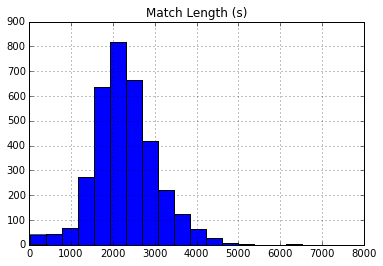

In [68]:
chocoDF.hist(column='Match Length (s)', bins=20)

In [37]:
meepo = chocoDF[chocoDF['Hero ID']==82]

In [45]:
wr_x, wr_y = bin_win_rate(meepo, 10)

<Container object of 10 artists>

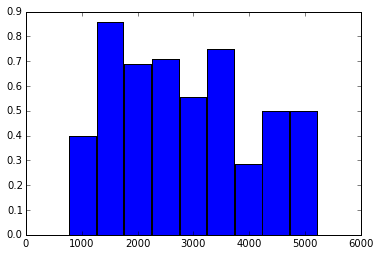

In [56]:
plt.bar(wr_x,wr_y,width=480)

In [57]:
antimage = chocoDF[chocoDF['Hero ID']==1]

In [58]:
wr_x2, wr_y2 = bin_win_rate(antimage, 10)

<Container object of 10 artists>

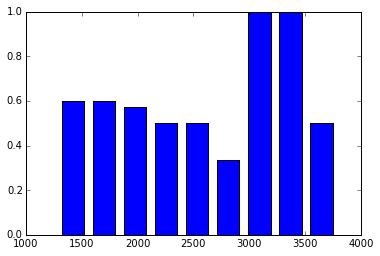

In [60]:
plt.bar(wr_x2,wr_y2,width=200)

In [61]:
medusa = chocoDF[chocoDF['Hero ID']==94]

In [62]:
wr_x3, wr_y3 = bin_win_rate(medusa, 10)

<Container object of 10 artists>

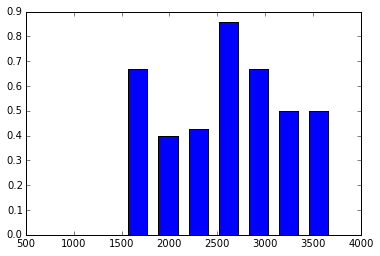

In [63]:
plt.bar(wr_x3,wr_y3,width=200)

In [64]:
chen = chocoDF[chocoDF['Hero ID']==66]

In [65]:
wr_x3, wr_y3 = bin_win_rate(chen, 10)

<Container object of 10 artists>

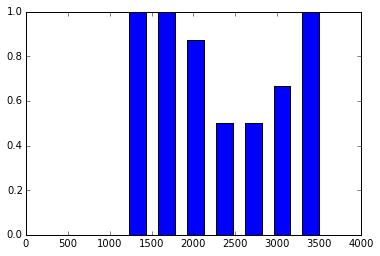

In [66]:
plt.bar(wr_x3,wr_y3,width=200)

In [67]:
len(chen)

23

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000057433AC8>]], dtype=object)

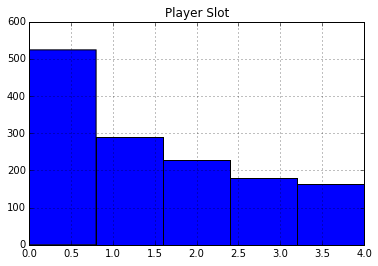

In [76]:
chocoDF[chocoDF['Player Slot']<5].hist(column='Player Slot', bins=5)

In [77]:
chocoDF.groupby('Player Slot').sum()

,Assists,Deaths,GPM,Hero ID,Kills,Match Counter,Match ID,Match Length (s),Player ID,Win Y/N,XPM
Player Slot,,,,,,,,,,,
0,5599,3184,244582,26919,3804,524,498005713832,1262579,24454022568,304,253969
1,3159,1770,131789,14559,2188,291,212402096731,675868,13580382762,164,135077
2,2301,1290,104415,12298,1722,228,145801951472,523207,10640299896,129,105853
3,1896,1031,80161,9513,1266,179,112340866461,408411,8353568778,106,85510
4,1678,968,67458,7773,1168,163,120313302781,377178,7606881066,86,73311
128,8724,4318,401263,41695,6554,818,758599736172,1853831,38174409276,570,426563
129,3937,1925,174903,20035,3026,373,305736901284,841582,17407157286,245,192855
130,3575,1772,151997,18335,2576,340,228049382458,763612,15867113880,209,168160
131,3000,1562,127887,14927,2275,286,211644352602,655740,13347042852,179,141484


In [80]:
grouped = chocoDF.groupby('Player Slot')

In [83]:
grouped.aggregate([np.sum, np.mean, np.std])

Assists                      Deaths                         GPM  \
                sum       mean       std    sum      mean       std     sum   
Player Slot                                                                   
0              5599  10.685115  6.109743   3184  6.076336  3.617714  244582   
1              3159  10.855670  6.369631   1770  6.082474  3.476036  131789   
2              2301  10.092105  5.877256   1290  5.657895  3.311518  104415   
3              1896  10.592179  6.191345   1031  5.759777  3.380937   80161   
4              1678  10.294479  5.953454    968  5.938650  3.274845   67458   
128            8724  10.665037  5.827405   4318  5.278729  3.379043  401263   
129            3937  10.554960  5.946021   1925  5.160858  3.447903  174903   
130            3575  10.514706  6.177064   1772  5.211765  3.419859  151997   
131            3000  10.489510  6.596509   1562  5.461538  3.529861  127887   
132            2348  10.920930  6.281428   1165  5.418605  3.277169   99565   

                                    Hero ID     ...     Match Length (s)  \
                   mean         std     sum     ...                  std   
Player Slot                                     ...                        
0            466.759542  222.662808   26919     ...           778.630207   
1            452.883162  237.877033   14559     ...           795.323833   
2            457.960526  256.708792   12298     ...           765.049018   
3            447.826816  194.535107    9513     ...           663.498304   
4            413.852761  219.224031    7773     ...           620.834922   
128          490.541565  163.768768   41695     ...           733.641602   
129          468.908847  155.536903   20035     ...           806.292751   
130          447.050000  163.632657   18335     ...           738.230316   
131          447.157343  161.896349   14927     ...           817.182966   
132          463.093023  167.340887   10815     ...           720.693416   

               Player ID                     Win Y/N                      \
                     sum      mean       std     sum      mean       std   
Player Slot                                                                
0            24454022568  46667982  5.266868     304  0.580153  0.494005   
1            13580382762  46667982  1.393364     164  0.563574  0.496796   
2            10640299896  46667982       NaN     129  0.565789  0.496743   
3             8353568778  46667982       NaN     106  0.592179  0.492808   
4             7606881066  46667982       NaN      86  0.527607  0.500776   
128          38174409276  46667982  6.262998     570  0.696822  0.459913   
129          17407157286  46667982  3.826440     245  0.656836  0.475403   
130          15867113880  46667982  3.199167     209  0.614706  0.487382   
131          13347042852  46667982  1.098197     179  0.625874  0.484745   
132          10033616130  46667982       NaN     138  0.641860  0.480572   

                XPM                          
                sum        mean         std  
Player Slot                                  
0            253969  484.673664  165.077369  
1            135077  464.182131  172.028159  
2            105853  464.267544  179.842891  
3             85510  477.709497  186.498018  
4             73311  449.760736  167.156903  
128          426563  521.470660  171.511681  
129          192855  517.037534  201.506660  
130          168160  494.588235  172.219096  
131          141484  494.699301  179.860200  
132          111516  518.679070  178.830506  

[10 rows x 33 columns]

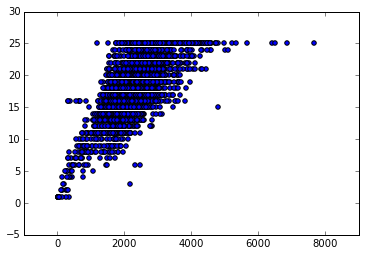

In [93]:
plt.scatter(chocoDF['Match Length (s)'], chocoDF['Level'])